In [1]:
cd /home/weicc/WORK/JOB/FitTools/electron/bg+snr+pwn/DH/Vela_new/cutoff_new_noHESS/chains_analysis

/home/weicc/WORK/JOB/FitTools/electron/bg+snr+pwn/DH/Vela_new/cutoff_new_noHESS/chains_analysis


In [2]:
import numpy as np
import pandas as pd
import h5py

# load samples
samples_keys = ['p', 'chi2',
                'eg1', 'enorm', 'er_cutoff', 'vela_gamma', 'vela_r',
                'vela_B', 'pwn_eta', 'pwn_gamma', 'pwn_ecut']
samples = pd.read_table('../chains/test-.txt', names=samples_keys, sep='\s+')

# load Fermi_UL
hfile = h5py.File('Fermi_UL.h5', 'r')
print (list(hfile.keys()))
FermiUL = pd.DataFrame(hfile['method_1_LLR'].value)
hfile.close()

# load result
hfile = h5py.File('Result.h5', 'r')
Result = {key : pd.DataFrame(hfile[key].value) for key in hfile.keys()}
hfile.close()

Result.keys()

['method_1_Bay', 'method_1_LLR', 'method_2_Bay', 'method_2_LLR']


dict_keys(['Ekin', 'Fermi_Ee', 'Fermi_Es', 'PWN', 'Vela', 'bg_aniso', 'bg_flux', 'bg_positron', 'total_aniso', 'total_aniso_binave'])

In [3]:
# samples[['p', 'chi2']]
# Result['total_aniso_binave']
sp_tabin = pd.concat([samples[['p', 'chi2']], Result['total_aniso_binave']], axis=1)
sp_tabin.head()

,p,chi2,0,1,2,3,4,5,6,7,8
0,1.146977e-99,-1355.884893,0.003212,0.004866,0.007367,0.010923,0.015843,0.022277,0.029641,0.041054,0.059341
1,1.176595e-99,-1355.939883,0.002381,0.003020,0.003828,0.004809,0.006019,0.007488,0.009107,0.011697,0.016578
2,1.211825e-99,-1356.002890,0.001874,0.002420,0.003179,0.004157,0.005456,0.007269,0.009303,0.012885,0.020760
3,1.485501e-99,-1356.414139,0.001601,0.001904,0.002272,0.002710,0.003249,0.003906,0.004655,0.005911,0.008486
4,1.702258e-99,-1356.690546,0.002075,0.002515,0.003044,0.003659,0.004403,0.005302,0.006278,0.007897,0.011240


In [4]:
# sp_tabin.describe()
sp_tabin = sp_tabin.sort_values(axis=0, ascending=True, by='chi2')
sp_tabin.head()

,p,chi2,0,1,2,3,4,5,6,7,8
11492,0.000192,-1840.242427,0.010174,0.012862,0.015920,0.019275,0.022922,0.026800,0.030234,0.034968,0.040585
11614,0.000185,-1840.173014,0.008710,0.011294,0.014319,0.017725,0.021521,0.025651,0.029433,0.034751,0.041650
11942,0.000171,-1840.006060,0.008725,0.011355,0.014422,0.017857,0.021656,0.025744,0.029439,0.034527,0.040579
11941,0.000162,-1839.906548,0.009147,0.011799,0.014865,0.018273,0.022018,0.026036,0.029628,0.034578,0.040417
11754,0.000160,-1839.872994,0.008027,0.010391,0.013164,0.016295,0.019804,0.023627,0.027155,0.032112,0.038248


In [5]:
sp_tabin['cump'] = sp_tabin['p'].cumsum()
sp_tabin.head()

,p,chi2,0,1,2,3,4,5,6,7,8,cump
11492,0.000192,-1840.242427,0.010174,0.012862,0.015920,0.019275,0.022922,0.026800,0.030234,0.034968,0.040585,0.000192
11614,0.000185,-1840.173014,0.008710,0.011294,0.014319,0.017725,0.021521,0.025651,0.029433,0.034751,0.041650,0.000377
11942,0.000171,-1840.006060,0.008725,0.011355,0.014422,0.017857,0.021656,0.025744,0.029439,0.034527,0.040579,0.000548
11941,0.000162,-1839.906548,0.009147,0.011799,0.014865,0.018273,0.022018,0.026036,0.029628,0.034578,0.040417,0.000710
11754,0.000160,-1839.872994,0.008027,0.010391,0.013164,0.016295,0.019804,0.023627,0.027155,0.032112,0.038248,0.000870


In [6]:
tabin = sp_tabin[sp_tabin['cump'] < 0.5][np.arange(9)]
print (tabin.shape)
tabin.head()

(3166, 9)


,0,1,2,3,4,5,6,7,8
11492,0.010174,0.012862,0.015920,0.019275,0.022922,0.026800,0.030234,0.034968,0.040585
11614,0.008710,0.011294,0.014319,0.017725,0.021521,0.025651,0.029433,0.034751,0.041650
11942,0.008725,0.011355,0.014422,0.017857,0.021656,0.025744,0.029439,0.034527,0.040579
11941,0.009147,0.011799,0.014865,0.018273,0.022018,0.026036,0.029628,0.034578,0.040417
11754,0.008027,0.010391,0.013164,0.016295,0.019804,0.023627,0.027155,0.032112,0.038248


In [7]:
taMAX = tabin.max()
taMIN = tabin.min()
Fermi_Es, Fermi_Ee = Result['Fermi_Es'].transpose(), Result['Fermi_Ee'].transpose()
taplot = pd.concat([Fermi_Es, Fermi_Ee, taMIN, taMAX, FermiUL[[2]]], axis=1, ignore_index=True)
taplot.columns = ['Es', 'Ee', 'min', 'max', 'FUL']
taplot.head()

,Es,Ee,min,max,FUL
0,42.5789,56.7418,0.002188,0.010723,0.002869
1,56.7418,76.0843,0.002969,0.013414,0.003415
2,76.0843,101.4550,0.004062,0.016521,0.003900
3,101.4550,135.3140,0.005502,0.020047,0.004665
4,135.3140,181.6270,0.007429,0.024423,0.006883


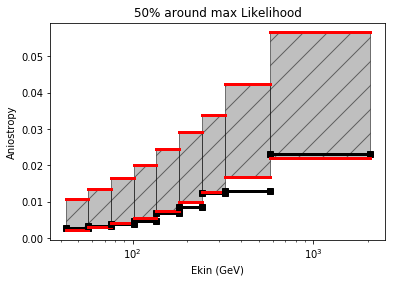

In [59]:
# plot
import matplotlib.pyplot as plt

for i in taplot.index:
    x = [taplot['Es'][i], taplot['Ee'][i]]
    y = [taplot['FUL'][i], taplot['FUL'][i]]
    y1 = [taplot['min'][i], taplot['min'][i]]
    y2 = [taplot['max'][i], taplot['max'][i]]
    plt.plot(x, y, 'k-s', lw=3)
    plt.plot(x, y1, 'r', x, y2, 'r', lw=3)
    plt.fill_between(x, y1, y2, edgecolor='k', facecolor='grey', alpha=0.5, hatch='/')


plt.xscale('log')
plt.title('50% around max Likelihood')
plt.xlabel('Ekin (GeV)')
plt.ylabel('Aniostropy')
plt.show()